# Conversion Attribution

**We will automate common marketing analysis and determine why certain channels have lower than usual conversion rates**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marketing = pd.read_csv('./datasets/marketing.csv')

**To avoid repetition, we create a function that calculates conversion rate**

In [13]:
def conversion_rate(dataframe, column_names):
    #Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    
    #Total number of users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    #Conversion Rate
    conversion_rate = column_conv/column_total
    
    #Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    
    return conversion_rate

**Let's test the function calculating some conversion rate**

date_served  age_group  
1/1/18       0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
Name: user_id, dtype: float64
age_group    0-18 years  19-24 years  24-30 years  30-36 years  36-45 years  \
date_served                                                                   
1/1/18         0.155172     0.196721     0.105263     0.040816     0.042553   
1/10/18        0.100000     0.216667     0.129630     0.068182     0.088889   
1/11/18        0.085106     0.187500     0.173913     0.000000     0.000000   
1/12/18        0.071429     0.226415     0.076923     0.075000     0.000000   
1/13/18        0.105263     0.130435     0.113636     0.052632     0.100000   

age_group    45-55 years  55+ years  
date_served                          
1/1/18          0.022222   0.086957  
1/10/18         0.090909   0.100000  
1/11/18         0.055556   0.029412  
1/12/18         

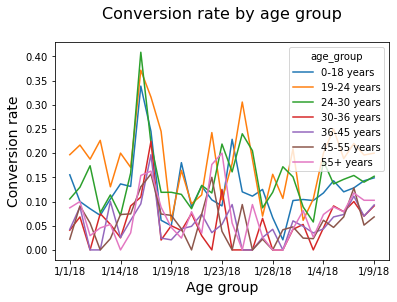

In [11]:
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

print(age_group_conv.head())

age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

print(age_group_df.head())

age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

**Now a function for plotting**

In [14]:
def plotting_conv(dataframe):
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.show()
        plt.clf()

**Time to use both functions**

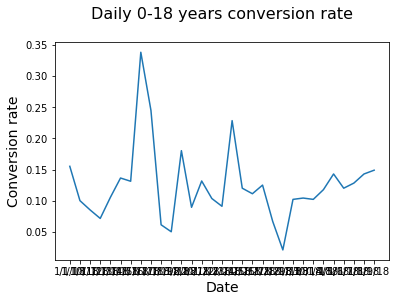

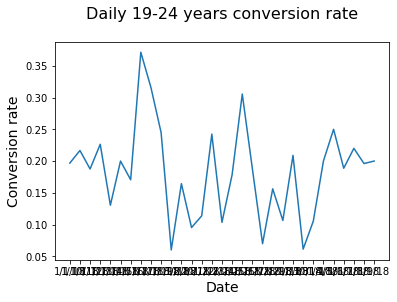

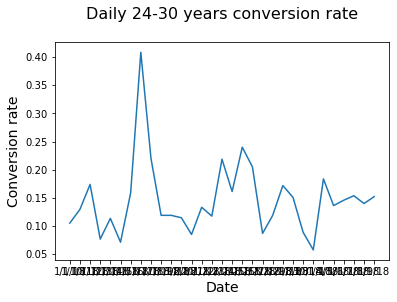

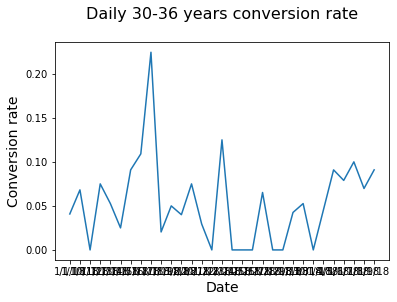

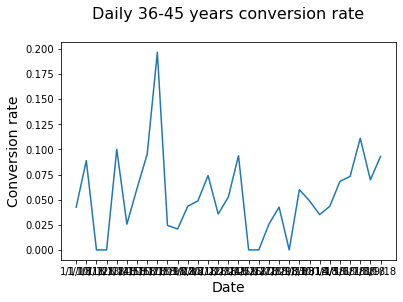

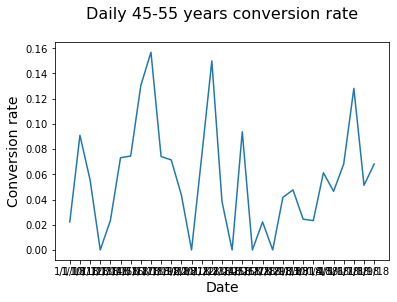

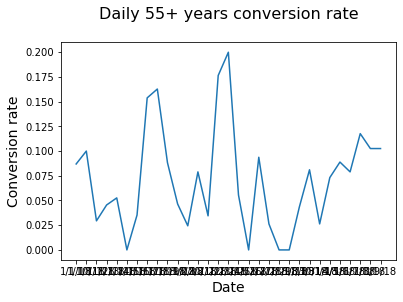

<Figure size 432x288 with 0 Axes>

In [17]:
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])

age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

plotting_conv(age_group_df)

## Identifying inconsistencines